# Estimasi Pandemi COVID-19

## Memuat Data

Kita akan menggunakan data individu yang terinfeksi COVID-19, yang disediakan oleh [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) di [Johns Hopkins University](https://jhu.edu/). Dataset tersedia di [Repositori GitHub ini](https://github.com/CSSEGISandData/COVID-19).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

Kami dapat memuat data terbaru langsung dari GitHub menggunakan `pd.read_csv`. Jika karena suatu alasan data tidak tersedia, Anda selalu dapat menggunakan salinan yang tersedia secara lokal di folder `data` - cukup hapus komentar pada baris di bawah yang mendefinisikan `base_url`:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

Kita dapat melihat bahwa setiap baris tabel mendefinisikan jumlah individu yang terinfeksi untuk setiap negara dan/atau provinsi, dan kolom-kolomnya sesuai dengan tanggal. Tabel serupa dapat dimuat untuk data lainnya, seperti jumlah yang sembuh dan jumlah kematian.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Memahami Data

Dari tabel di atas, peran kolom provinsi tidak jelas. Mari kita lihat berbagai nilai yang ada di kolom `Province/State`:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## Pra-pemrosesan Data

Kita tidak tertarik untuk memecah negara menjadi wilayah-wilayah lebih kecil, sehingga kita akan terlebih dahulu menghapus pemecahan ini dan menambahkan informasi dari semua wilayah bersama-sama, untuk mendapatkan informasi untuk seluruh negara. Hal ini dapat dilakukan menggunakan `groupby`:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

Anda dapat melihat bahwa karena menggunakan `groupby` semua DataFrame sekarang diindeks berdasarkan Negara/Wilayah. Dengan demikian, kita dapat mengakses data untuk negara tertentu dengan menggunakan `.loc`:


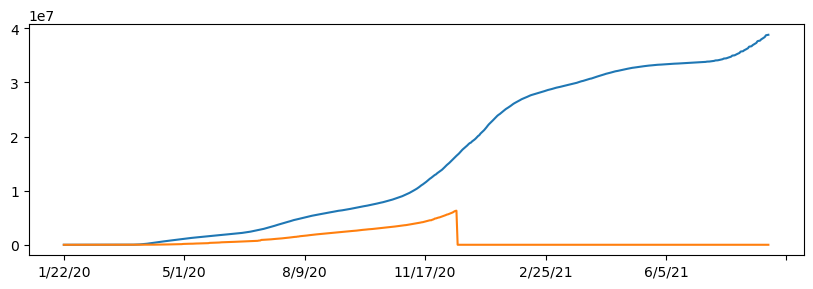

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **Catatan** bagaimana kita menggunakan `[2:]` untuk menghapus dua elemen pertama dari sebuah urutan yang berisi geolokasi suatu negara. Kita juga dapat menghilangkan kedua kolom tersebut sepenuhnya:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Menyelidiki Data

Sekarang, mari beralih ke menyelidiki sebuah negara tertentu. Mari kita buat sebuah frame yang berisi data infeksi yang diindeks berdasarkan tanggal:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

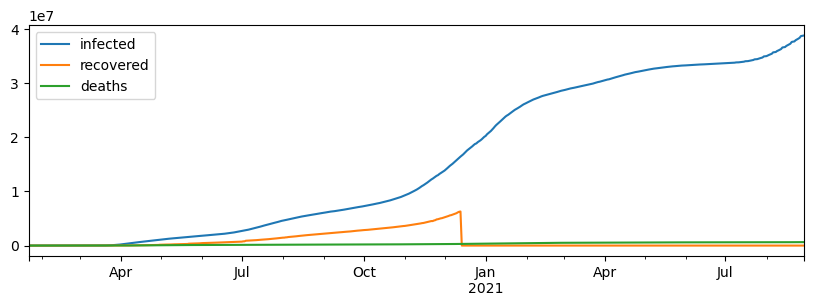

In [134]:
df.plot()
plt.show()

Sekarang mari kita hitung jumlah orang yang baru terinfeksi setiap hari. Ini akan memungkinkan kita melihat kecepatan perkembangan pandemi. Cara termudah untuk melakukannya adalah menggunakan `diff`:


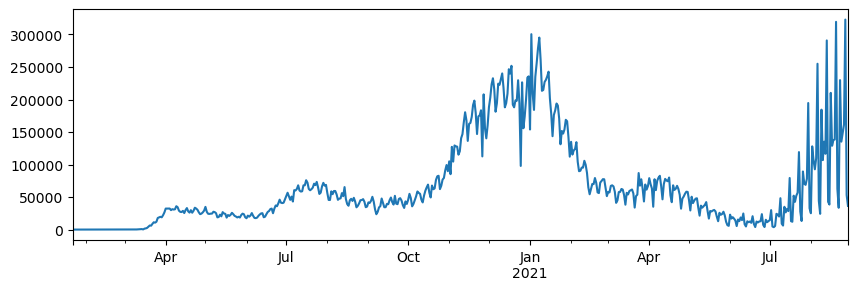

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

Kita dapat melihat fluktuasi tinggi dalam data. Mari kita lihat lebih dekat salah satu bulan:


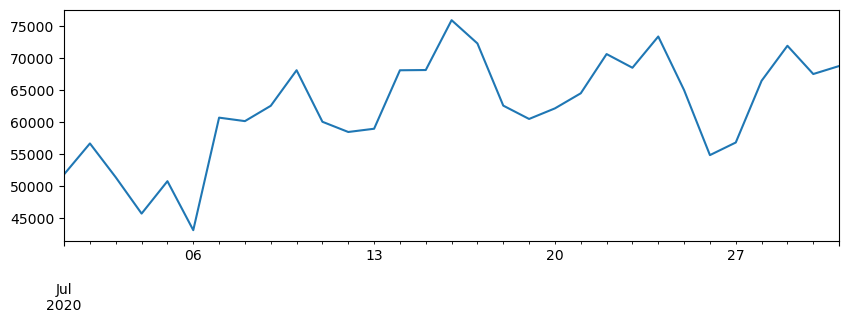

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

Tampaknya jelas ada fluktuasi mingguan dalam data. Karena kita ingin dapat melihat tren, masuk akal untuk meratakan kurva dengan menghitung rata-rata berjalan (yaitu, untuk setiap hari kita akan menghitung nilai rata-rata dari beberapa hari sebelumnya):


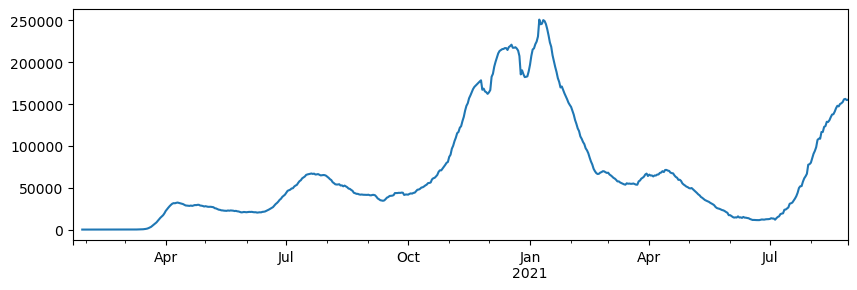

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

Untuk dapat membandingkan beberapa negara, kita mungkin ingin mempertimbangkan populasi negara tersebut, dan membandingkan persentase individu yang terinfeksi terhadap populasi negara. Untuk mendapatkan populasi negara, mari kita muat dataset negara:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

Karena dataset ini berisi informasi tentang negara dan provinsi, untuk mendapatkan populasi seluruh negara kita perlu sedikit cerdik:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

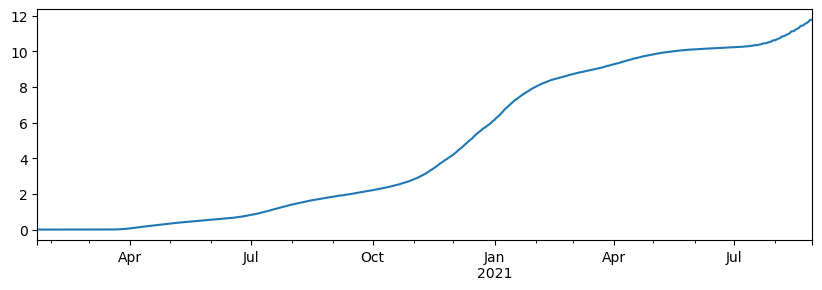

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## Menghitung $R_t$

Untuk melihat seberapa menular suatu penyakit, kita melihat **angka reproduksi dasar** $R_0$, yang menunjukkan jumlah orang yang akan terinfeksi lebih lanjut oleh satu orang yang terinfeksi. Ketika $R_0$ lebih dari 1, epidemi kemungkinan akan menyebar.

$R_0$ adalah sifat bawaan dari penyakit itu sendiri, dan tidak memperhitungkan beberapa langkah perlindungan yang mungkin diambil orang untuk memperlambat pandemi. Selama perkembangan pandemi, kita dapat memperkirakan angka reproduksi $R_t$ pada waktu tertentu $t$. Telah ditunjukkan bahwa angka ini dapat diperkirakan secara kasar dengan mengambil jendela waktu selama 8 hari, dan menghitung $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
di mana $I_t$ adalah jumlah individu yang baru terinfeksi pada hari $t$.

Mari kita hitung $R_t$ untuk data pandemi kita. Untuk melakukan ini, kita akan mengambil jendela bergulir dari 8 nilai `ninfected`, dan menerapkan fungsi untuk menghitung rasio di atas:


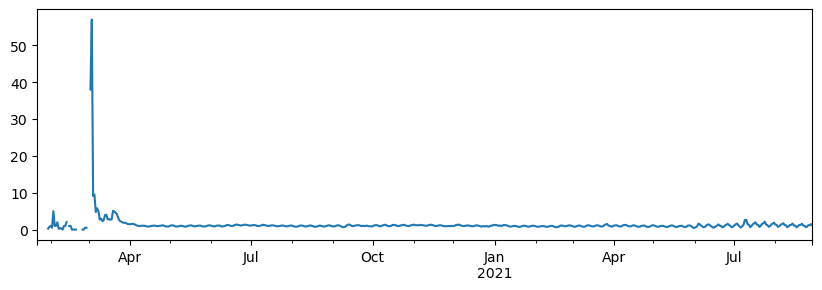

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

Anda dapat melihat bahwa terdapat beberapa celah pada grafik. Celah tersebut dapat disebabkan oleh nilai `NaN` atau `inf` yang ada dalam dataset. Nilai `inf` mungkin muncul akibat pembagian dengan 0, sedangkan `NaN` dapat menunjukkan data yang hilang, atau tidak adanya data yang tersedia untuk menghitung hasil (seperti di awal frame kita, di mana jendela bergulir dengan lebar 8 belum tersedia). Untuk membuat grafik terlihat lebih rapi, kita perlu mengisi nilai-nilai tersebut menggunakan fungsi `replace` dan `fillna`.

Mari kita lihat lebih lanjut pada awal pandemi. Kita juga akan membatasi nilai sumbu y untuk hanya menampilkan nilai di bawah 6, agar lebih mudah dilihat, dan menggambar garis horizontal pada nilai 1.


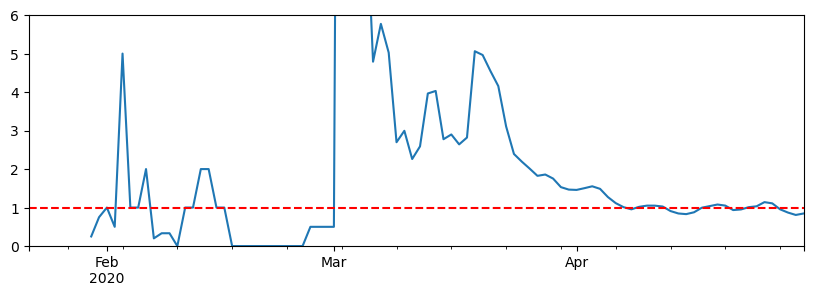

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

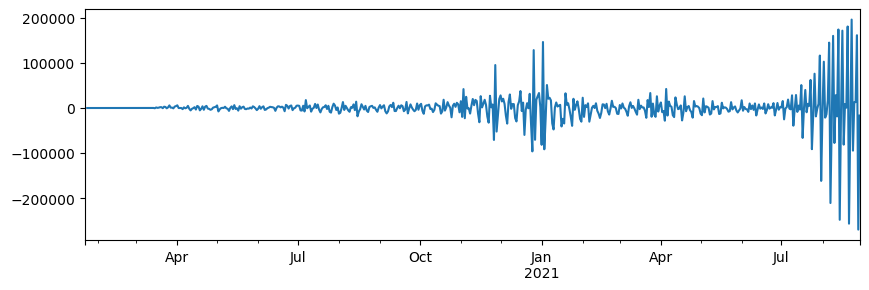

In [143]:
df['ninfected'].diff().plot()
plt.show()

Mengingat fakta bahwa terdapat banyak fluktuasi dalam data yang disebabkan oleh pelaporan, masuk akal untuk meratakan kurva dengan menjalankan rata-rata bergulir untuk mendapatkan gambaran keseluruhan. Mari kita fokus lagi pada bulan-bulan pertama pandemi:


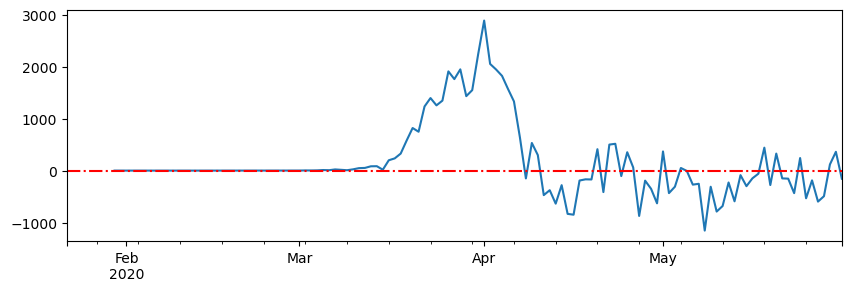

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## Tantangan

Sekarang saatnya bagi Anda untuk bermain lebih jauh dengan kode dan data! Berikut beberapa saran yang bisa Anda coba:
* Lihat penyebaran pandemi di berbagai negara.
* Buat grafik $R_t$ untuk beberapa negara dalam satu plot untuk perbandingan, atau buat beberapa plot berdampingan.
* Lihat bagaimana jumlah kematian dan kesembuhan berkorelasi dengan jumlah kasus terinfeksi.
* Cobalah untuk mengetahui berapa lama penyakit biasanya berlangsung dengan mengamati secara visual korelasi antara tingkat infeksi dan tingkat kematian, serta mencari beberapa anomali. Anda mungkin perlu melihat ke berbagai negara untuk mengetahuinya.
* Hitung tingkat fatalitas dan bagaimana tingkat tersebut berubah seiring waktu. Anda mungkin ingin mempertimbangkan durasi penyakit dalam hitungan hari untuk menggeser satu deret waktu sebelum melakukan perhitungan.


## Referensi

Anda dapat melihat studi lebih lanjut tentang penyebaran epidemi COVID dalam publikasi berikut:
* [Sliding SIR Model untuk Estimasi Rt selama Pandemi COVID](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), tulisan blog oleh [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimasi Angka Reproduksi yang Bergantung pada Waktu untuk Wabah COVID-19 Global](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Kode untuk makalah di atas di GitHub](https://github.com/shwars/SlidingSIR)



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan penerjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berusaha untuk memberikan hasil yang akurat, harap diingat bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang otoritatif. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemahan profesional oleh manusia. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
